In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score



# Since 2010, which players have had the most game-winning hits?

Albert Pujols, Miguel Cabrera, and Joey Voto have had the most game-winning hits with 151, 130, and 128, respectively.

In [2]:
game_logs = pd.read_csv("../capstone/gl_csv/concat_game_logs.csv")

/var/folders/0b/5brsgfcj1659x_1js0_30dgm0000gn/T/ipykernel_23082/1136596188.py:1: DtypeWarning: Columns (13,14,15,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  game_logs = pd.read_csv("../capstone/gl_csv/concat_game_logs.csv")


In [6]:
game_logs_2010 = game_logs[game_logs["1 Date"] > 20100000]

In [7]:
game_logs_2010["101 Game Winning RBI player name"].value_counts().head(5)

(none)            1311
Albert Pujols      151
Miguel Cabrera     130
Joey Votto         128
Justin Upton       118
Name: 101 Game Winning RBI player name, dtype: int64

# Since 2017, which players have had the most game winning hits?

Nolan Arenado, Kyle Seagar, and Jose Ramirez have had the most game winning hits since 2017, with 60, 58, and 57, respectively. I do note that multiple players on the top 20 of this list belong to the same team. For example as of 2021, 3 belong to the Cardinals, 4 belong to the Dodgers, 4 belong to the Astros, 3 belong to the Phillies, 3 belong to the Braves, 2 belong to the Yankees.

In [3]:
game_logs_2017 = game_logs[game_logs["1 Date"] > 20170000]

In [9]:
game_logs_2017["101 Game Winning RBI player name"].value_counts().head(30)

(none)              501
Nolan Arenado        60
Kyle Seager          58
Jose Ramirez         57
Paul Goldschmidt     56
Bryce Harper         54
Aaron Judge          51
Carlos Correa        51
Alex Bregman         51
Kyle Schwarber       49
Cody Bellinger       49
Anthony Rendon       49
Freddie Freeman      48
Yulieski Gurriel     48
Matt Olson           47
Anthony Rizzo        47
Nelson Cruz          46
Jose Abreu           46
Jesus Aguilar        45
Yadier Molina        45
David Peralta        45
Manny Machado        44
Nick Castellanos     44
Marcell Ozuna        44
Christian Yelich     44
Jose Altuve          44
Ozzie Albies         43
J.D. Martinez        43
Joey Votto           43
George Springer      43
Name: 101 Game Winning RBI player name, dtype: int64

# Which player has the most hits since 2017?

Whit Merrifield, Charlie Blackmon, and DJ LaMahieu have had the most hits since 2017, with 821, 783, and 764, respectively.

In [190]:
batting = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/batting.csv")

In [191]:
batting_2017 = batting[batting["yearID"]>=2017]

In [192]:
batting_2017.groupby("playerID")["H"].sum().sort_values(ascending = False).head(30)

playerID
merriwh01    821
blackch02    783
lemahdj01    764
freemfr01    755
arenano01    744
casteni01    743
altuvjo01    731
goldspa01    728
machama01    726
turnetr01    725
abreujo02    725
bogaexa01    711
bettsmo01    709
martijd02    702
gourryu01    700
lindofr01    696
segurje01    696
hosmeer01    689
anderti01    684
ramirjo01    676
hernace02    672
storytr01    667
yelicch01    658
semiema01    653
brantmi02    653
rizzoan01    634
baezja01     631
cruzne02     626
rosared01    625
escobed01    623
Name: H, dtype: int64

# Which player has the most walks since 2017?

Bryce Harper, Carlos Santana, and Joey Votto have had the most walks since 2017, with 446, 439, and 432, respectively.

In [27]:
batting_2017.groupby("playerID")["BB"].sum().sort_values(ascending = False).head(20)

playerID
harpebr03    446
santaca01    439
vottojo01    432
troutmi01    388
sotoju01     373
goldspa01    366
freemfr01    358
judgeaa01    352
bettsmo01    347
yelicch01    344
gallojo01    341
bregmal01    338
grandya01    338
carpema01    332
hoskirh01    316
mccutan01    314
ramirjo01    313
phamth01     312
rizzoan01    312
confomi01    308
Name: BB, dtype: int64

# Which players have been hit by the most pitches since 2017?

Anthony Rizzo, Mark Canha, and Derek Dietrich have been hit by the most pitches since 2017, with 104, 71, and 69 respectively.

In [21]:
batting_2017.groupby("playerID")["HBP"].sum().sort_values(ascending = False).head(10)

playerID
rizzoan01    104.0
canhama01     71.0
dietrde01     69.0
abreujo02     64.0
turneju01     63.0
bryankr01     60.0
wongko01      56.0
martest01     54.0
roblevi01     54.0
contrwi01     53.0
Name: HBP, dtype: float64

In [22]:
batting_2017["yearID"].value_counts()

2021    1706
2019    1569
2018    1535
2017    1494
2020    1360
Name: yearID, dtype: int64

# Which team has the most hits since 2017?

The Red Sox, Astros, and Colorado have had the most number of hits sicne 2017 with 6510, 6483, and 6296, respectively.

In [32]:
batting_2017.groupby("teamID")["H"].sum().sort_values(ascending = False).head(10)

teamID
BOS    6510
HOU    6483
COL    6296
WAS    6246
ATL    6195
MIN    6149
CHA    6094
NYA    6069
LAN    6008
TBA    5988
Name: H, dtype: int64

# What is the average number of runs, hits, doubles, triples, homeruns, rbi, stolen bases, caught stealing, strike out, hit by pitch, sacrafice hits, sacrafice flies, and hit into double play for a player who has played in at least 100 games one or more times since 2017? 

An everyday player is defined as a player who played in at least 100 games each season.

In [193]:
batting_2017.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102831,abadfe01,2017,1,BOS,AL,48,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
102832,abreujo02,2017,1,CHA,AL,156,621,95,189,43,...,102.0,3.0,0.0,35,119.0,6.0,15.0,0.0,4.0,21.0
102833,adamecr01,2017,1,COL,NL,12,13,1,0,0,...,0.0,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0
102834,adamsau02,2017,1,WAS,NL,6,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
102835,adamsla01,2017,1,ATL,NL,85,109,19,30,4,...,20.0,10.0,0.0,10,37.0,0.0,1.0,1.0,1.0,3.0


In [194]:
batting_2017.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

Filtering to identify the seasons where the player has played in more than 100 games, as a indication they are a starting everyday player.

In [195]:
batting_2017_everyday_players = batting_2017[batting_2017["G"]>100]

In [196]:
batting_2017_offense_ctgs = batting_2017_everyday_players[['R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH',
       'SF', 'GIDP']]

Below are the average stats of the above specified offensive categories for a Major League player for seasons in which he  played in more than 100 games. 

In [197]:
batting_2017_offense_ctgs.describe()

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,66.229686,120.276273,24.313109,2.278440,18.660888,63.521127,7.163597,2.560130,45.956663,106.997833,5.475623,0.884074,3.484290,9.876490
std,22.683843,35.172345,8.776108,2.171458,10.307362,23.763849,8.191068,2.552998,21.362745,34.331641,4.385962,1.710817,2.322791,4.961448
min,6.000000,10.000000,2.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,94.000000,18.000000,1.000000,11.000000,46.500000,2.000000,1.000000,30.000000,83.000000,2.000000,0.000000,2.000000,6.000000
50%,64.000000,120.000000,24.000000,2.000000,17.000000,62.000000,4.000000,2.000000,42.000000,106.000000,4.000000,0.000000,3.000000,9.000000
75%,82.000000,147.000000,30.000000,3.000000,25.000000,79.000000,10.000000,4.000000,59.000000,129.000000,7.000000,1.000000,5.000000,13.000000
max,137.000000,213.000000,56.000000,14.000000,59.000000,132.000000,60.000000,16.000000,145.000000,217.000000,27.000000,13.000000,12.000000,28.000000


Below are the average stats of the above specified offensive categories broken down by specific player.

In [198]:
stats = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GIDP']

batting_2017_ev_players_avg_stats = batting_2017_everyday_players.groupby("playerID")[stats].mean()

In [199]:
batting_2017_ev_players_avg_stats.head()

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,
abreujo02,83.5,162.25,36.75,2.5,29.5,105.0,2.0,0.5,42.25,130.75,15.25,0.0,7.5,21.75
acunaro01,102.5,151.00,24.00,3.0,33.5,82.5,26.5,7.0,60.50,155.50,7.50,0.0,2.0,6.00
adamewi01,69.0,135.00,25.00,1.0,20.0,52.0,4.0,2.0,46.00,153.00,3.00,3.0,1.0,9.00
adamsma01,42.0,70.00,14.00,0.0,20.0,56.0,0.0,0.0,20.00,115.00,2.00,0.0,1.0,7.00
adriaeh01,37.0,64.50,16.00,1.5,5.5,33.5,2.5,0.5,22.50,62.00,1.50,2.5,2.5,4.00


# For players who have played in at least 100 games one or more times since 2017, which ones are above average in the offensive categories above, and below average in caught stealing, strike outs, and GIDP?

Interesting to note that Ketel Marte of the Arizona Diamondbacks is above average in all of the offensive categories except "SH", "SF", and "HBP", and below average in caught stealing, strikeouts, and GIDP. This means he had favorable stats in 11 of the 14 categories. But his sample size of 2 seasons in which he played more than 100 games, in the past five years, is smaller that the other players.

The only other player that is similar to Marte in grading out favorably in 11 of the 14 categories is Kyle Tucker of the Houston Astros. But Tucker's sample size is small as well: only 1 season in which he's played in more than 100 games in the past 5 years.

In [200]:
# Filtering to identify the players who have above average numbers

a = batting_2017_ev_players_avg_stats["R"] > 66
b = batting_2017_ev_players_avg_stats["H"] > 120
c = batting_2017_ev_players_avg_stats["2B"] > 24
d = batting_2017_ev_players_avg_stats["3B"] > 2
e = batting_2017_ev_players_avg_stats["HR"] > 18
f = batting_2017_ev_players_avg_stats["RBI"] > 63
g = batting_2017_ev_players_avg_stats["SB"] > 7
h = batting_2017_ev_players_avg_stats["CS"] < 3
i = batting_2017_ev_players_avg_stats["BB"] > 46
j = batting_2017_ev_players_avg_stats["SO"] < 107
k = batting_2017_ev_players_avg_stats["HBP"] > 5
l = batting_2017_ev_players_avg_stats["SH"] > 1
m = batting_2017_ev_players_avg_stats["SF"] > 3
n = batting_2017_ev_players_avg_stats["GIDP"] < 10 

In [65]:
batting_2017_ev_players_avg_stats[a & b & c & d & e & f & g & h & i & j & n]

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,
marteke01,82.5,161.0,31.0,10.5,23.0,75.5,8.0,1.5,53.5,82.5,3.5,0.5,2.0,9.5


In [66]:
batting_2017_ev_players_avg_stats[a & b & c & d & e & f & g & h & i & j & m]

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,
tuckeky01,83.0,149.0,37.0,3.0,30.0,92.0,14.0,2.0,53.0,90.0,1.0,0.0,5.0,10.0


# As of the 2021 season, which team has the highest number of players who have played in at least 100 games one or more times since 2017 and are above average in offensive categories (runs, hits, HR, RBI, BB) over the past 5 seasons? Who are these players?

AS of the 2021 season, the Padres, Astros, and Dodgers had the highest number of players who fit this criteria, each with 5. The Braves and Angels were next, with 4 players each, and then 10 teams are tied for third, each with 3 players.

Under the radar/lesser known players on this list:
- Ryan McMahon (Rockies), mcmahry01
- Yoan Moncada (White Sox), moncayo01
- Travis Shaw (Red Sox), shawtr01
- Steven Souza (Mariners), souzast01

In [201]:
batting_2017_ev_players_avg_stats[a & b & e & f & i]

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,
acunaro01,102.50,151.00,24.00,3.00,33.50,82.50,26.50,7.00,60.50,155.50,7.50,0.0,2.00,6.00
alonspe01,92.00,151.00,28.50,2.50,45.00,107.00,2.00,0.00,66.00,155.00,16.50,0.0,3.50,16.50
altuvjo01,100.50,172.25,31.75,2.50,24.75,74.75,15.00,4.50,55.00,84.00,5.50,1.5,3.50,16.00
alvaryo01,92.00,149.00,35.00,1.00,33.00,104.00,1.00,0.00,50.00,145.00,8.00,0.0,3.00,16.00
arenano01,96.75,174.50,36.50,3.50,37.50,115.75,2.50,1.50,61.75,104.25,3.50,0.5,6.75,17.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uptonju01,80.50,132.50,27.50,0.50,29.00,89.50,9.00,3.50,60.50,161.50,6.50,0.0,3.50,9.00
uriaslu01,77.00,122.00,25.00,1.00,23.00,75.00,5.00,1.00,63.00,116.00,10.00,1.0,3.00,9.00
vottojo01,81.25,144.50,29.25,1.25,24.75,78.25,3.25,0.25,98.75,108.50,6.25,0.0,4.00,13.00


In [202]:
test = batting_2017_ev_players_avg_stats[a & b & e & f & i]

In [69]:
test2 = [x for x in test.index]

In [70]:
batting_2017_ev_player_100games = batting_2017[batting_2017["playerID"].isin(test2)]

In [71]:
test_batting = batting_2017_ev_player_100games[batting_2017_ev_player_100games["yearID"] == 2021].copy()

In [72]:
test_batting.drop_duplicates("playerID", inplace = True)

In [163]:
test_batting["teamID"].value_counts(ascending = False)

SDN    5
HOU    5
LAN    5
ATL    4
LAA    4
NYA    3
CIN    3
PHI    3
TOR    3
MIN    3
WAS    3
BOS    3
TBA    3
COL    3
MIL    3
NYN    2
OAK    2
CHN    2
CHA    2
SLN    2
KCA    2
ARI    2
TEX    1
SEA    1
BAL    1
CLE    1
PIT    1
Name: teamID, dtype: int64

# What is the average number of runs, hits, doubles, triples, homeruns, rbi, stolen bases, caught stealing, strike out, hit by pitch, sacrafice hits, sacrafice flies, and hit into double play for a player who has played in at least 500 games since 2017? 

In [73]:
# Groupby players who have played in more than 500 games in the past 5 years
a = batting_2017.groupby("playerID")["G"].sum() >500

In [74]:
# Turning groupby results into a dataframe
b = a.to_frame()

In [75]:
# used to following article to help me reset index of the dataframe
# https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/#:~:text=In%20order%20to%20set%20index,row%20of%20the%20pandas%20DataFrame.
b.reset_index(inplace = True)

In [76]:
# Filtering the dataframe to identify the players who have played in more than 500 games in the past 5 years
b_true = b[b["G"] == True]

In [77]:
# Creating a playerID list of the players who have played in at least 500 games in the past 5 years. 
ev_player_500games_list = [x for x in b_true["playerID"]]

In [78]:
# Used the following stackoverflow article to filter rows using values in the playerID list
# https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
batting_2017_ev_player_500games = batting_2017[batting_2017["playerID"].isin(ev_player_500games_list)]

In [79]:
batting_2017_ev_player_500games["G"].mean()

108.18385650224215

In [80]:
batting_2017_ev_player_500games_offense_ctgs = batting_2017_ev_player_500games[['R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH',
       'SF', 'GIDP']]

See below for the average number of runs, hits, doubles, triples, homeruns, rbi, stolen bases, caught stealing, strike out, hit by pitch, sacrafice hits, sacrafice flies, and hit into double play for a player who has played in at least 500 games since 2017

In [81]:
batting_2017_ev_player_500games_offense_ctgs.describe()

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,57.860987,102.974589,21.112108,1.937220,16.665172,55.346786,6.366218,2.198804,39.916293,86.757848,4.452915,0.512706,3.026906,8.375187
std,29.882606,50.912490,11.614607,2.092674,10.848784,29.552033,7.821672,2.447215,24.414010,43.837936,3.963110,1.135401,2.497159,5.473238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,54.000000,11.000000,0.000000,8.000000,30.000000,1.000000,0.000000,21.000000,50.000000,2.000000,0.000000,1.000000,4.000000
50%,58.000000,108.000000,21.000000,1.000000,15.000000,55.000000,4.000000,1.000000,36.000000,86.000000,4.000000,0.000000,2.000000,8.000000
75%,81.000000,146.000000,30.000000,3.000000,24.000000,77.000000,9.000000,3.000000,55.000000,119.000000,6.000000,1.000000,4.000000,12.000000
max,137.000000,213.000000,56.000000,14.000000,52.000000,130.000000,59.000000,14.000000,134.000000,217.000000,27.000000,8.000000,12.000000,28.000000


# Of the players who have played in more than 500 games over the past 5 years, which players are above average in the offensive categories above, and below average in caught stealing, strike outs, and GIDP?

Of the players who have played in at least 500 games over the past 5 seasons, the Los Angeles Dodgers' Mookie Betts and the Cleveland Guardians' Jose Ramirez are above average in all offensive categories except "SH" and "SF", and below average in caught stealing, strikeouts, and GIDP.

In [82]:
stats = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GIDP']

batting_2017_ev_players_avg_stats_500games = batting_2017_ev_player_500games.groupby("playerID")[stats].mean()

In [83]:
a = batting_2017_ev_players_avg_stats_500games["R"] > 58
b = batting_2017_ev_players_avg_stats_500games["H"] > 103
c = batting_2017_ev_players_avg_stats_500games["2B"] > 21
d = batting_2017_ev_players_avg_stats_500games["3B"] > 2
e = batting_2017_ev_players_avg_stats_500games["HR"] > 17
f = batting_2017_ev_players_avg_stats_500games["RBI"] > 55
g = batting_2017_ev_players_avg_stats_500games["SB"] > 6
h = batting_2017_ev_players_avg_stats_500games["CS"] < 2
i = batting_2017_ev_players_avg_stats_500games["BB"] > 40
j = batting_2017_ev_players_avg_stats_500games["SO"] < 87
k = batting_2017_ev_players_avg_stats_500games["HBP"] > 4
l = batting_2017_ev_players_avg_stats_500games["SH"] > 1
m = batting_2017_ev_players_avg_stats_500games["SF"] > 3
n = batting_2017_ev_players_avg_stats_500games["GIDP"] < 8

In [84]:
batting_2017_ev_players_avg_stats_500games[a & b & c & d & e & f & g & i & j]

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,
bettsmo01,101.0,141.8,34.2,3.2,24.8,71.8,18.4,3.8,69.4,79.0,5.2,0.0,5.0,6.4
ramirjo01,88.2,135.2,35.0,3.8,28.8,84.0,22.4,4.4,62.6,70.6,4.6,0.0,4.6,7.6


# Which teams in the 2021 season had the highest number of players who are above average over the past 5 years in offensive categories (runs, hits, HR, RBI, BB)?

In 2021, the Los Angeles Dodgers had the most players who fit this criteria with three, and nine other teams were tied with two players that met this criteria.

- LAN    3
- HOU    2
- ATL    2
- CIN    2
- TOR    2
- SLN    2
- SDN    2
- NYN    2
- BOS    2
- COL    2

In [85]:
test = batting_2017_ev_players_avg_stats_500games[a & b & e & f & i]

In [86]:
test2 = [x for x in test.index]

In [87]:
batting_ev_player_500games_atleastone_ab_avg = batting_2017[batting_2017["playerID"].isin(test2)]

In [88]:
test3 = batting_ev_player_500games_atleastone_ab_avg[batting_ev_player_500games_atleastone_ab_avg["yearID"] == 2021].copy()

In [89]:
test3.drop_duplicates("playerID", inplace = True)

In [90]:
test3["teamID"].value_counts()

LAN    3
HOU    2
ATL    2
CIN    2
TOR    2
SLN    2
SDN    2
NYN    2
BOS    2
COL    2
MIN    1
PHI    1
NYA    1
BAL    1
CLE    1
LAA    1
CHN    1
KCA    1
SEA    1
WAS    1
MIL    1
Name: teamID, dtype: int64

# EDA into Starting Pitcher Stats

In [91]:
pitching = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/pitching.csv")

In [92]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [93]:
pitching_2017 = pitching[pitching["yearID"] >= 2017]

# Which starting pitchers have started the most games since 2017?

Patrick Corbin, Gerritt Cole, Zack Greinke, and Aaron Nola have started the most games since 2017, with 140, 140, 139, and 138, respectively.

In [120]:
pitching_2017.groupby("playerID")["GS"].sum().sort_values(ascending = False).head(200)

playerID
corbipa01    140
colege01     140
greinza01    139
nolaaa01     138
lynnla01     136
            ... 
gombeau01     38
peacobr01     38
hernael01     38
mizeca01      37
suterbr01     37
Name: GS, Length: 200, dtype: int64

# What is the average pitching stats of the starting pitchers who have had 20 or more starts in at least one season over the past 5 seasons?

See descriptive stats below. For example, the average number of wins and losses is 10 and 9 (rounded up), respectively. Average earned run avergae (ERA) is 4.11, and bases-on-balls (BB) (aks walks) is 50.

In [94]:
pitching_2017_starters_20games = pitching_2017[pitching_2017["GS"] >= 20]

In [95]:
pitching_2017_starters_20games.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,457.0,2018.698031,1.475181,2017.000,2017.000,2018.000,2019.000,2021.000
stint,457.0,1.002188,0.046778,1.000,1.000,1.000,1.000,2.000
W,457.0,9.816193,3.880496,0.000,7.000,10.000,12.000,21.000
L,457.0,8.652079,3.082093,2.000,6.000,9.000,11.000,17.000
G,457.0,28.702407,4.493057,20.000,25.000,29.000,32.000,59.000
GS,457.0,27.404814,4.244219,20.000,24.000,28.000,31.000,35.000
CG,457.0,0.361050,0.706217,0.000,0.000,0.000,1.000,5.000
SHO,457.0,0.192560,0.470756,0.000,0.000,0.000,0.000,3.000
SV,457.0,0.039387,0.261955,0.000,0.000,0.000,0.000,3.000
IPouts,457.0,465.792123,91.036855,167.000,390.000,468.000,536.000,669.000


In [96]:
pitching_2017_starters_20games.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [97]:
stats = ['W', 'L', 'GS', 'CG', 'SHO', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'WP', 'HBP', 'SH', 'SF', 'GIDP']

pitching_2017_starters_20games_avg_stats = pitching_2017_starters_20games.groupby("playerID")[stats].mean()

In [98]:
pitching_2017_starters_20games_avg_stats.head().T

playerID,adlemti01,alcansa01,alzolad01,anderbr04,anderch01
W,5.000,7.500,5.000,8.5000,9.666667
L,11.000,14.500,13.000,9.0000,5.333333
GS,20.000,32.500,21.000,27.5000,27.333333
CG,0.000,1.500,0.000,0.0000,0.000000
SHO,0.000,1.000,0.000,0.0000,0.000000
H,124.000,175.000,112.000,141.5000,123.333333
ER,75.000,79.000,64.000,60.5000,59.000000
HR,29.000,22.000,25.000,15.5000,22.333333
BB,51.000,65.500,34.000,38.5000,49.333333
SO,108.000,176.000,128.000,74.0000,128.333333


# For the starting pitchers with 20 or more starts in at least one season over the past five seasons, which ones are better than average in hits allowed, home runs, walks, strikeouts, opposition batting average, and ERA?

The fourteen starting pitchers listed below fit this criteria.

In [99]:
pitching_2017_starters_20games_avg_stats.columns

Index(['W', 'L', 'GS', 'CG', 'SHO', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'WP', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [100]:
a= pitching_2017_starters_20games_avg_stats["W"] > 10
b=pitching_2017_starters_20games_avg_stats["L"] < 9
c=pitching_2017_starters_20games_avg_stats["GS"] > 27
d=pitching_2017_starters_20games_avg_stats["CG"] > 1
e=pitching_2017_starters_20games_avg_stats["SHO"] > 0 
f=pitching_2017_starters_20games_avg_stats["H"] < 146
g=pitching_2017_starters_20games_avg_stats["ER"] < 70
h=pitching_2017_starters_20games_avg_stats["HR"] < 21
i=pitching_2017_starters_20games_avg_stats["BB"] < 49
j=pitching_2017_starters_20games_avg_stats["SO"] > 148
k=pitching_2017_starters_20games_avg_stats["BAOpp"] < 0.247
l=pitching_2017_starters_20games_avg_stats["ERA"] < 4.11
m=pitching_2017_starters_20games_avg_stats["WP"] < 5
n=pitching_2017_starters_20games_avg_stats["HBP"] < 6

o=pitching_2017_starters_20games_avg_stats["SH"] < 3
p=pitching_2017_starters_20games_avg_stats["SF"] < 4
q=pitching_2017_starters_20games_avg_stats["GIDP"] > 12

In [101]:
pitching_2017_starters_20games_avg_stats[f & h & i & j & k & l]

,W,L,GS,CG,SHO,H,ER,HR,BB,SO,BAOpp,ERA,WP,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,
bassich01,11.000000,4.500000,26.000000,0.500000,0.500000,126.000000,58.000000,18.000000,43.000000,150.000000,0.223500,3.480000,4.000000,12.000000,1.000000,4.500000,8.500000
berrijo01,11.750000,8.000000,27.250000,1.000000,0.250000,144.750000,68.500000,20.000000,48.000000,165.500000,0.231250,3.722500,5.000000,10.750000,2.250000,4.250000,10.500000
buehlwa01,12.666667,4.333333,28.666667,0.666667,0.000000,132.333333,54.333333,17.000000,42.000000,192.666667,0.205000,2.783333,4.333333,6.333333,3.666667,4.000000,10.000000
burneco01,11.000000,5.000000,28.000000,0.000000,0.000000,123.000000,45.000000,7.000000,34.000000,234.000000,0.201000,2.430000,5.000000,6.000000,1.000000,4.000000,7.000000
hillri01,11.500000,6.500000,24.500000,0.500000,0.000000,103.500000,52.000000,19.000000,45.000000,158.000000,0.211000,3.490000,2.000000,8.500000,4.000000,1.500000,6.000000
kershcl01,13.250000,5.500000,25.750000,0.250000,0.000000,130.750000,50.500000,20.750000,30.250000,172.500000,0.221250,2.905000,7.000000,1.750000,4.000000,1.500000,12.000000
ohtansh01,9.000000,2.000000,23.000000,0.000000,0.000000,98.000000,46.000000,15.000000,44.000000,156.000000,0.207000,3.180000,10.000000,10.000000,2.000000,4.000000,8.000000
paxtoja01,12.666667,5.666667,27.000000,0.666667,0.333333,128.333333,58.666667,18.333333,44.666667,183.333333,0.229667,3.520000,10.000000,2.000000,1.666667,3.666667,9.000000
priceda01,11.500000,6.000000,26.000000,0.500000,0.000000,130.000000,60.500000,20.000000,41.000000,152.500000,0.244000,3.930000,2.000000,6.500000,0.500000,2.500000,8.500000


# Which teams in the 2021 season had the most starting pitchers with better than average hits allowed, home runs, walks, strikeouts, opposition batting average, and ERA?

The Los Angeles Dodgers had the most starting pitchers that met this criteria, with three. The Brewers were second with two players, and nine teams were tied for third with 1 player each.

In [102]:
test = pitching_2017_starters_20games_avg_stats[f & h & i & j & k & l]

In [103]:
test2 = [x for x in test.index]
pitching_2017_starters_20games_ab_avg = pitching_2017[pitching_2017["playerID"].isin(test2)]
test_starting_pitching = pitching_2017_starters_20games_ab_avg[pitching_2017_starters_20games_ab_avg["yearID"] == 2021].copy()

In [104]:
test_starting_pitching.drop_duplicates("playerID", inplace = True)

In [105]:
test_starting_pitching["teamID"].value_counts(ascending = False)

LAN    3
MIL    2
OAK    1
MIN    1
TBA    1
LAA    1
SEA    1
MIA    1
BOS    1
WAS    1
SFN    1
Name: teamID, dtype: int64

# What are the average stats for relief pitchers with 20 or more appearances in at least one season over the past 5 seasons?

I categorized a pitcher as relief pitcher if they had less than 5 game starts (GS) anytime in the past 5 seasons. I used this to distinguish the relief pitchers from the starting pitchers. A pitcher with many game start means they are a starting pitcher, not a reliever. See below for the average stats of relief pitchers with 20 or more appearances in at least one season over the past five seasons.

In [106]:
pitching_2017_relief = pitching_2017[pitching_2017["GS"] < 5]

In [107]:
pitching_2017_relief_20games = pitching_2017_relief[pitching_2017_relief["G"] >= 20]

In [108]:
pitching_2017_relief_20games.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,1309.0,2018.907563,1.468792,2017.00,2018.000,2019.000,2020.000,2021.000
stint,1309.0,1.095493,0.301707,1.00,1.000,1.000,1.000,3.000
W,1309.0,2.502674,1.979490,0.00,1.000,2.000,4.000,12.000
L,1309.0,2.195569,1.827821,0.00,1.000,2.000,3.000,12.000
G,1309.0,42.391902,17.480044,20.00,26.000,39.000,59.000,83.000
GS,1309.0,0.226127,0.696796,0.00,0.000,0.000,0.000,4.000
CG,1309.0,0.000000,0.000000,0.00,0.000,0.000,0.000,0.000
SHO,1309.0,0.000000,0.000000,0.00,0.000,0.000,0.000,0.000
SV,1309.0,3.675325,7.860258,0.00,0.000,1.000,2.000,57.000
IPouts,1309.0,128.647059,54.447032,35.00,79.000,121.000,174.000,313.000


# Of these relief pitchers, which ones have better than average hits allowed, home runs, walks, strikeouts, opposition batting average, and ERA?

Thirteen relief pitchers listed below fit this criteria.

In [109]:
stats = ['W', 'L', 'G', 'GS', 'CG', 'SHO','SV', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'WP', 'HBP', 'R','SH', 'SF', 'GIDP']

pitching_2017_relief_20games_avg_stats = pitching_2017_relief_20games.groupby("playerID")[stats].mean()

In [110]:
a = pitching_2017_relief_20games_avg_stats["W"] > 3 
b = pitching_2017_relief_20games_avg_stats["L"] < 2
c = pitching_2017_relief_20games_avg_stats["G"] > 42
d = pitching_2017_relief_20games_avg_stats["GS"] > 0
e = pitching_2017_relief_20games_avg_stats["CG"] == 0
f = pitching_2017_relief_20games_avg_stats["SHO"] == 0
g = pitching_2017_relief_20games_avg_stats["SV"] > 4
h = pitching_2017_relief_20games_avg_stats["H"] < 38
i = pitching_2017_relief_20games_avg_stats["ER"] < 18
j = pitching_2017_relief_20games_avg_stats["HR"] < 5
k = pitching_2017_relief_20games_avg_stats["BB"] < 17
l = pitching_2017_relief_20games_avg_stats["SO"] > 45
m = pitching_2017_relief_20games_avg_stats["BAOpp"] < 0.235
n = pitching_2017_relief_20games_avg_stats["ERA"] < 4.03
o = pitching_2017_relief_20games_avg_stats["WP"] < 2
p = pitching_2017_relief_20games_avg_stats["HBP"] < 2
q = pitching_2017_relief_20games_avg_stats["R"] < 20
r = pitching_2017_relief_20games_avg_stats["SH"] < 1
s = pitching_2017_relief_20games_avg_stats["SF"] < 1
t = pitching_2017_relief_20games_avg_stats["GIDP"] > 3


In [111]:
pitching_2017_relief_20games_avg_stats[h & j & k & l & m & n]

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,BAOpp,ERA,WP,HBP,R,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
anderni01,2.500000,2.000000,34.000000,0.000000,0.0,0.0,0.500000,26.000000,12.000000,4.000000,9.000000,55.000000,0.199000,3.015000,2.000000,1.000000,12.000000,0.000000,0.500000,1.500000
castijo03,3.000000,3.000000,37.000000,0.000000,0.0,0.0,0.000000,23.000000,14.000000,3.000000,12.000000,52.000000,0.170000,3.290000,1.000000,3.000000,14.000000,0.000000,0.000000,0.000000
chafian01,1.200000,2.400000,59.200000,0.000000,0.0,0.0,1.000000,37.200000,14.600000,3.000000,16.600000,49.200000,0.222000,2.792000,1.800000,1.600000,15.200000,1.000000,1.400000,3.600000
claseem01,3.000000,4.000000,46.000000,0.500000,0.0,0.0,12.500000,35.500000,8.000000,2.000000,11.000000,47.500000,0.212500,1.800000,2.000000,0.500000,13.000000,0.500000,0.000000,4.500000
gileske01,0.750000,2.250000,42.750000,0.000000,0.0,0.0,20.750000,33.500000,13.250000,3.750000,11.250000,54.750000,0.226500,3.320000,1.750000,0.500000,13.750000,0.500000,0.500000,2.000000
handbr01,3.000000,3.166667,44.166667,0.000000,0.0,0.0,20.666667,33.833333,14.000000,4.666667,14.666667,60.833333,0.199833,2.738333,1.333333,4.500000,16.500000,1.166667,0.833333,3.000000
harriwi02,3.000000,1.750000,48.750000,0.000000,0.0,0.0,1.750000,37.000000,13.250000,4.750000,11.000000,49.750000,0.230000,2.757500,2.750000,0.500000,15.000000,0.500000,0.250000,3.250000
kahnlto01,1.750000,1.500000,41.250000,0.000000,0.0,0.0,0.250000,30.250000,15.000000,4.000000,13.000000,53.500000,0.229500,3.857500,3.750000,1.000000,17.250000,0.250000,1.750000,3.000000
osunaro01,3.000000,3.000000,51.666667,0.000000,0.0,0.0,29.666667,36.000000,16.000000,4.000000,8.000000,58.333333,0.199000,2.666667,2.333333,2.333333,17.000000,0.666667,1.333333,2.666667


# Which teams in the 2021 season had the most relief pitchers with better than average hits allowed, home runs, walks, strikeouts, opposition batting average, and ERA over the past 5 seasons?

The Nationals and Rays had the most relief pitchers that fit this criteria, with 2 players each. Five other teams are tied for second with one player each.

In [112]:
test = pitching_2017_relief_20games_avg_stats[h & j & k & l & m & n]

In [113]:
test2 = [x for x in test.index]
pitching_2017_relief_20games_ab_avg = pitching_2017[pitching_2017["playerID"].isin(test2)]
test_relief = pitching_2017_relief_20games_ab_avg[pitching_2017_relief_20games_ab_avg["yearID"] == 2021].copy()

In [114]:
test_relief.drop_duplicates("playerID", inplace = True)

In [115]:
test_relief["teamID"].value_counts(ascending = False)

TBA    2
WAS    2
CHN    1
CLE    1
TEX    1
HOU    1
ARI    1
Name: teamID, dtype: int64

# Which team in the 2021 season had the most relief pitchers with better than average number of saves over the past 5 years?

The Phillies had the post relief pitchers that fit this criteria with 5 players, followed by five teams tied for second with 4 players apiece.

In [116]:
test = pitching_2017_relief_20games_avg_stats[g]

In [117]:
test2 = [x for x in test.index]
pitching_2017_relief_20games_saves_ab_avg = pitching_2017[pitching_2017["playerID"].isin(test2)]
test_saves = pitching_2017_relief_20games_saves_ab_avg[pitching_2017_relief_20games_saves_ab_avg["yearID"]== 2021].copy()

In [118]:
test_saves.drop_duplicates("playerID", inplace = True)

In [119]:
test_saves["teamID"].value_counts(ascending = False)

PHI    5
NYN    4
ATL    4
MIN    4
SLN    4
KCA    4
TEX    3
NYA    3
CLE    3
CHN    3
DET    3
SDN    3
SEA    3
LAN    3
LAA    2
OAK    2
SFN    2
BAL    2
MIL    2
COL    2
WAS    2
TBA    2
CIN    2
CHA    1
HOU    1
TOR    1
ARI    1
BOS    1
Name: teamID, dtype: int64

# EDA in defense/fielding stats

In [120]:
fielding = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/fielding.csv")

In [121]:
fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


In [122]:
fielding_2017 = fielding[fielding["yearID"] >= 2017]

# Of the players who have played in 100 or more games at least once in the past 5 seasons which player has better than average errors per game rate?

150 players fit this criteria.

In [123]:
fielding_2017_100games = fielding_2017[fielding_2017["GS"] >= 100]

The average number of errors for players who have played in 100 or more games at least once in the past 5 seasons is 7 errors over an average of 133 games, which comes to a rate of 0.0526 errors per game.

In [124]:
fielding_2017_100games.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,522.0,2018.687739,1.474089,2017.0,2017.0,2018.0,2019.00,2021.0
stint,522.0,1.001916,0.043769,1.0,1.0,1.0,1.00,2.0
G,522.0,132.783525,15.631096,101.0,120.0,133.0,145.00,162.0
GS,522.0,128.310345,17.107974,100.0,114.0,129.0,142.00,162.0
InnOuts,522.0,3377.666667,454.392248,2463.0,2992.5,3377.0,3743.50,4305.0
PO,522.0,385.034483,344.827564,48.0,170.0,237.5,346.75,1403.0
A,522.0,137.283525,145.527250,0.0,7.0,64.5,270.00,493.0
E,522.0,7.308429,5.140883,0.0,3.0,6.0,10.00,28.0
DP,522.0,39.074713,41.942747,0.0,1.0,20.0,78.00,147.0
PB,43.0,6.232558,3.407535,0.0,4.0,6.0,9.00,16.0


In [125]:
stats = [x for x in fielding_2017_100games.columns]

In [126]:
fielding_2017_100games_avg_stats = fielding_2017_100games.groupby("playerID")[stats].mean()

In [127]:
test = fielding_2017_100games_avg_stats[fielding_2017_100games_avg_stats["E"] < 7]

In [197]:
test

,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
playerID,,,,,,,,,,,,,,
acunaro01,2018.50,1.0,132.00,130.50,3450.00,254.50,6.50,4.00,0.50,NaN,NaN,NaN,NaN,NaN
aguilje01,2019.50,1.0,122.50,115.50,3021.50,859.00,84.50,6.00,93.00,NaN,NaN,NaN,NaN,NaN
arozara01,2021.00,1.0,119.00,117.00,3076.00,207.00,5.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN
baddoak01,2021.00,1.0,117.00,107.00,2859.00,252.00,4.00,3.00,1.00,NaN,NaN,NaN,NaN,NaN
baderha01,2021.00,1.0,103.00,101.00,2660.00,289.00,4.00,3.00,1.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wolteto01,2019.00,1.0,112.00,102.00,2713.00,773.00,75.00,1.00,12.00,4.0,NaN,44.0,23.0,NaN
wongko01,2020.00,1.0,130.00,121.00,3198.50,207.00,320.50,5.50,77.00,NaN,NaN,NaN,NaN,NaN
yastrmi01,2021.00,1.0,127.00,119.00,3177.00,259.00,3.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN


# Of these players, which team had the most of them in the 2021 season?

The Yankees, Angels, Dodgers, and the White Sox were tied for first with six players apiece. Twelve teams were tied for second with five players apiece.

In [128]:
test2 = [x for x in test.index]
fielding_2017_100games_ab_avg = fielding_2017[fielding_2017["playerID"].isin(test2)]
test_fielding = fielding_2017_100games_ab_avg[fielding_2017_100games_ab_avg["yearID"]== 2021].copy()

In [129]:
test_fielding.drop_duplicates("playerID", inplace = True)

In [130]:
test_fielding["teamID"].value_counts(ascending= False)

NYA    6
LAA    6
LAN    6
CHA    6
ATL    5
HOU    5
CLE    5
PIT    5
TEX    5
NYN    5
OAK    5
CHN    5
SLN    5
MIL    5
CIN    5
DET    5
PHI    4
MIA    4
ARI    4
TBA    4
TOR    4
WAS    3
KCA    3
SFN    3
BAL    3
SDN    3
MIN    2
SEA    2
COL    2
BOS    2
Name: teamID, dtype: int64

# In the 2021 season, which teams had the most above average players in the hitting, pitching, and fielding?

The Dodgershad the most above average players with 14, followed by the Yankees and Brewers, both tied for second place with 11 above average players apiece.

To get the above answer, the first step was to merge the lists of above average players in hitting, pitching, and fielding, identified from the EDA earlier, and then determine which team had the highest number of these players.  

In [201]:
# Above average hitters obtained from EDA in the earlier sections
test_batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108795,acunaro01,2021,1,ATL,NL,82,297,72,84,19,...,52.0,17.0,6.0,49,85.0,2.0,9.0,0.0,5.0,0.0
108831,alonspe01,2021,1,NYN,NL,152,561,81,147,27,...,94.0,3.0,0.0,60,127.0,6.0,12.0,0.0,4.0,20.0
108833,altuvjo01,2021,1,HOU,AL,146,601,117,167,32,...,83.0,5.0,3.0,66,91.0,3.0,4.0,1.0,6.0,9.0
108837,alvaryo01,2021,1,HOU,AL,144,537,92,149,35,...,104.0,1.0,0.0,50,145.0,3.0,8.0,0.0,3.0,16.0
108864,arenano01,2021,1,SLN,NL,157,593,81,151,34,...,105.0,2.0,0.0,50,96.0,8.0,3.0,0.0,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110352,uptonju01,2021,1,LAA,AL,89,318,47,67,12,...,41.0,4.0,1.0,39,107.0,0.0,1.0,0.0,3.0,11.0
110355,uriaslu01,2021,1,MIL,NL,150,490,77,122,25,...,75.0,5.0,1.0,63,116.0,3.0,10.0,1.0,3.0,9.0
110388,vottojo01,2021,1,CIN,NL,129,448,73,119,23,...,99.0,1.0,0.0,77,127.0,6.0,4.0,0.0,4.0,7.0
110401,walshja01,2021,1,LAA,AL,144,530,70,147,34,...,98.0,2.0,1.0,48,152.0,6.0,4.0,0.0,3.0,7.0


In [202]:
# Above average fielders obtained from EDA in the earlier sections
test_fielding

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
144775,acunaro01,2021,1,ATL,NL,OF,81,80.0,2026.0,134,4,2.0,0,NaN,NaN,NaN,NaN,NaN
144789,aguilje01,2021,1,MIA,NL,1B,113,112.0,2887.0,824,83,8.0,94,NaN,NaN,NaN,NaN,NaN
144871,arozara01,2021,1,TBA,AL,OF,119,117.0,3076.0,207,5,1.0,1,NaN,NaN,NaN,NaN,NaN
144894,baddoak01,2021,1,DET,AL,OF,117,107.0,2859.0,252,4,3.0,1,NaN,NaN,NaN,NaN,NaN
144895,baderha01,2021,1,SLN,NL,OF,103,101.0,2660.0,289,4,3.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147037,wolteto01,2021,1,CHN,NL,2B,2,0.0,4.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN
147044,wongko01,2021,1,MIL,NL,2B,113,108.0,2811.0,164,229,2.0,51,NaN,NaN,NaN,NaN,NaN
147061,yastrmi01,2021,1,SFN,NL,OF,127,119.0,3177.0,259,3,1.0,1,NaN,NaN,NaN,NaN,NaN
147062,yelicch01,2021,1,MIL,NL,OF,107,103.0,2691.0,170,5,1.0,0,NaN,NaN,NaN,NaN,NaN


In [203]:
# Above average relief pitchers obtained from EDA in the earlier sections
test_relief

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
48431,anderni01,2021,1,TBA,AL,0,1,6,0,0,...,0.0,0,0.0,0,24.0,2,3,0.0,1.0,1.0
48560,chafian01,2021,1,CHN,NL,0,2,43,0,0,...,1.0,2,2.0,0,150.0,1,9,0.0,0.0,4.0
48574,claseem01,2021,1,CLE,AL,4,5,71,0,0,...,3.0,3,0.0,1,279.0,51,18,1.0,0.0,6.0
48784,handbr01,2021,1,WAS,NL,5,5,41,0,0,...,4.0,1,5.0,0,182.0,36,22,3.0,3.0,1.0
48792,harriwi02,2021,1,WAS,NL,0,1,8,0,0,...,0.0,0,0.0,0,30.0,2,6,0.0,0.0,0.0
49084,pattosp01,2021,1,TEX,AL,2,2,42,0,0,...,0.0,1,0.0,0,172.0,13,20,0.0,0.0,3.0
49128,pressry01,2021,1,HOU,AL,5,3,64,0,0,...,1.0,3,0.0,0,250.0,49,19,1.0,0.0,6.0
49167,roberda08,2021,1,TBA,AL,0,0,12,1,0,...,0.0,0,0.0,0,50.0,1,7,0.0,0.0,0.0
49268,soriajo01,2021,1,ARI,NL,1,4,31,0,0,...,0.0,1,1.0,1,125.0,20,14,0.0,1.0,3.0


In [204]:
# Above average closers (a form of relief pitcher) obtained from EDA in the earlier sections
test_saves

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
48425,alvarjo03,2021,1,PHI,NL,7,1,64,0,0,...,5.0,9,7.0,1,251.0,10,30,0.0,0.0,9.0
48460,bardda01,2021,1,COL,NL,7,8,67,0,0,...,1.0,4,7.0,0,304.0,44,41,1.0,0.0,3.0
48461,barlojo01,2021,1,TEX,AL,0,2,31,0,0,...,0.0,1,0.0,0,111.0,18,9,0.0,2.0,2.0
48462,barlosc01,2021,1,KCA,AL,5,3,71,0,0,...,2.0,4,2.0,0,306.0,28,20,0.0,2.0,4.0
48466,barnema01,2021,1,BOS,AL,6,5,60,0,0,...,2.0,3,2.0,0,222.0,44,25,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49299,sulseco01,2021,1,BAL,AL,5,4,60,0,0,...,0.0,6,0.0,1,257.0,18,20,1.0,1.0,3.0
49333,treinbl01,2021,1,LAN,NL,6,5,72,0,0,...,1.0,3,3.0,0,286.0,10,20,0.0,1.0,4.0
49334,trivilo01,2021,1,OAK,AL,7,8,71,0,0,...,2.0,7,4.0,0,310.0,44,32,2.0,1.0,6.0
49346,valdece01,2021,1,BAL,AL,2,2,39,0,0,...,2.0,2,1.0,0,210.0,16,32,0.0,1.0,3.0


In [205]:
# Above average starting pitchers obtained from EDA in the earlier sections
test_starting_pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
48471,bassich01,2021,1,OAK,AL,12,4,27,27,1,...,1.0,5,11.0,1,637.0,0,55,0.0,4.0,8.0
48487,berrijo01,2021,1,MIN,AL,7,5,20,20,1,...,0.0,3,8.0,0,490.0,0,53,2.0,3.0,5.0
48523,buehlwa01,2021,1,LAN,NL,16,4,33,33,0,...,2.0,5,6.0,0,815.0,0,61,7.0,3.0,17.0
48530,burneco01,2021,1,MIL,NL,11,5,28,28,0,...,0.0,5,6.0,0,657.0,0,47,1.0,4.0,7.0
48822,hillri01,2021,1,TBA,AL,6,4,19,19,0,...,0.0,3,8.0,1,389.0,0,41,1.0,3.0,10.0
48879,kershcl01,2021,1,LAN,NL,10,8,22,22,0,...,0.0,7,3.0,1,488.0,0,51,3.0,0.0,8.0
49067,ohtansh01,2021,1,LAA,AL,9,2,23,23,0,...,2.0,10,10.0,2,533.0,0,48,2.0,4.0,8.0
49086,paxtoja01,2021,1,SEA,AL,0,0,1,1,0,...,0.0,1,0.0,0,5.0,0,1,0.0,0.0,0.0
49129,priceda01,2021,1,LAN,NL,5,2,39,11,0,...,2.0,1,4.0,0,326.0,5,35,3.0,2.0,8.0
49185,rogertr01,2021,1,MIA,NL,7,8,25,25,0,...,2.0,4,5.0,1,550.0,0,46,6.0,2.0,8.0


In [131]:
merged_tests = pd.concat([test_batting, test_fielding, test_relief, test_saves, test_starting_pitching], axis = 0)

In [132]:
merged_tests.drop_duplicates("playerID", inplace = True)

In [133]:
merged_tests.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CG,SHO,SV,IPouts,ER,BAOpp,ERA,BK,BFP,GF
108795,acunaro01,2021,1,ATL,NL,82,297.0,72.0,84.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108831,alonspe01,2021,1,NYN,NL,152,561.0,81.0,147.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108833,altuvjo01,2021,1,HOU,AL,146,601.0,117.0,167.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108837,alvaryo01,2021,1,HOU,AL,144,537.0,92.0,149.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108864,arenano01,2021,1,SLN,NL,157,593.0,81.0,151.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
a = merged_tests["teamID"].value_counts(ascending = False)

In [135]:
a_df = a.to_frame()

In [136]:
a_df.reset_index(inplace = True)

In [137]:
a_df.rename(columns = {"index": "teamID", "teamID": "num_above_avg_players"}, inplace = True)

In [138]:
a_df

,teamID,num_above_avg_players
0,LAN,14
1,NYN,11
2,MIL,11
3,ATL,10
4,HOU,10
5,SLN,10
6,TBA,10
7,NYA,10
8,CHN,10
9,PHI,10


# Is there a relationship between the number of team wins and the number of above average players on the team?

Yes, there is a positive relationship between the two.
To answer this question, I merged the number of above average players per team in the 2021 season with total team wins, then plotted the results on a scatter plot.

In [139]:
teams = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/teams.csv")

In [140]:
teams_2021= teams[teams["yearID"] == 2021]

In [141]:
team_num_ab_avg_players = pd.merge(teams_2021, a_df)

In [142]:
team_num_ab_avg_players[["teamID", "W", "num_above_avg_players"]].sort_values(by = "num_above_avg_players", ascending = False)

,teamID,W,num_above_avg_players
13,LAN,106,14
15,MIL,95,11
18,NYN,77,11
1,ATL,88,10
26,TBA,100,10
25,SLN,90,10
5,CHN,71,10
22,SDN,79,10
20,PHI,82,10
19,OAK,86,10


On a scatterplot, I plotted the # of above average players per team on the x-axis, and the # of team wins on the y-axis. You can see there is a moderately positive relationship between the two: the higher the number of above average players on a team, the more wins that team has. However, there are exceptions, such as the Giants which only had six above average players but had approx. 100 wins, which matched the number of wins by the Dodgers, the team with the most above average players on their roster with 14. There is also a wide variation in results: Orioles, like the Giants had six above average players, but underperformed with just 52 wins.  
- The positive relationship between the # of above average players per team, and the # of team wins is indicated by a correlation of 0.44

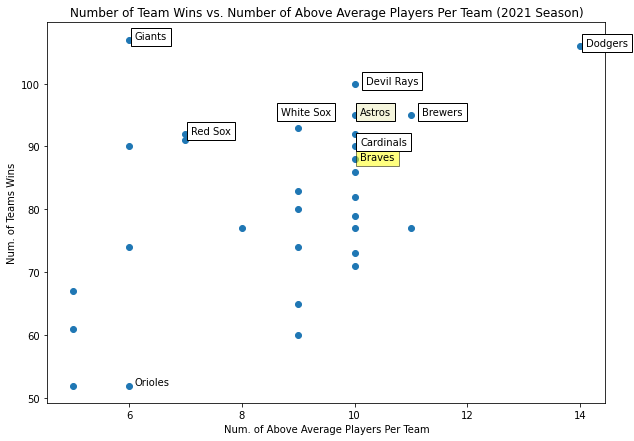

In [145]:
#https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a

plt.figure(figsize = (10, 7))
plt.scatter(team_num_ab_avg_players["num_above_avg_players"], team_num_ab_avg_players["W"])
plt.xlabel("Num. of Above Average Players Per Team")
plt.ylabel("Num. of Teams Wins")

plt.title("Number of Team Wins vs. Number of Above Average Players Per Team (2021 Season)")

plt.text(14+0.1, 106, "Dodgers",bbox=dict(facecolor="white"))
plt.text(6+0.1, 107, "Giants", bbox=dict(facecolor="white"))
plt.text(10+0.1, 88-0.1, "Braves", bbox=dict(facecolor="yellow", alpha =0.5))
plt.text(6+0.1, 52, "Orioles")
plt.text(10+0.1, 95, "Astros", bbox=dict(facecolor="beige"))
plt.text(10+0.1, 90+0.3, "Cardinals", bbox=dict(facecolor="white"))
plt.text(11+0.2, 95, "Brewers", bbox=dict(facecolor="white"))
plt.text(7+0.1, 92, "Red Sox", bbox=dict(facecolor="white"))
plt.text(9-0.3, 95, "White Sox", bbox=dict(facecolor="white"))
plt.text(10+0.2, 100, "Devil Rays", bbox=dict(facecolor="white"))

plt.savefig("../capstone/images/team_num_ab_avgplayers_and_wins.png");

In [223]:
# Calculating the correlation between wins and the number of above average players
#https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/
team_num_ab_avg_players["W"].corr(team_num_ab_avg_players["num_above_avg_players"])

0.4470867703147726

# Since 2017, which manager with at least 500 games in the past 5 seasons have managed teams with the highest average rankings?

Dave Roberts of the LA Dodgers, Brian Snitler of the Braves, and AJ Hinch of the Tigers have managed teams with the highest average ranking over the past five seasons.

In [157]:
managers = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/managers.csv")

In [158]:
managers_2017 = managers[managers["yearID"] >= 2017]

In [159]:
managers_2017[managers_2017["teamID"] == "BAL"]

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
3511,showabu99,2017,BAL,AL,1,162,75,87,5,N
3545,showabu99,2018,BAL,AL,1,162,47,115,5,N
3581,hydebr99,2019,BAL,AL,1,162,54,108,5,N
3614,hydebr99,2020,BAL,AL,1,60,25,35,4,N
3647,hydebr99,2021,BAL,AL,1,162,52,110,5,N


In [149]:
a = managers_2017.groupby("playerID")["G"].sum() > 500

In [150]:
a_df= a.to_frame()

In [151]:
managers_2017_500games = a_df[a_df["G"] == True]

In [152]:
managers_2017_500games.reset_index(inplace = True)

In [154]:
managers_2017_500games_list = [x for x in managers_2017_500games["playerID"]]

In [155]:
managers_2017_500games_full = managers_2017[managers_2017["playerID"].isin(managers_2017_500games_list)]

In [156]:
managers_2017_500games_full.groupby("playerID")["rank"].mean().sort_values(ascending = True).head(30)

playerID
roberda07    1.20
snitkbr99    1.40
hinchaj01    1.50
francte01    1.60
booneaa01    1.75
cashke01     2.00
counscr01    2.00
melvibo01    2.60
kaplega01    2.75
maddojo99    2.80
martida01    3.25
blackbu02    3.40
lovulto01    3.40
servasc01    3.40
renteri01    3.50
mattido01    3.60
Name: rank, dtype: float64

# Can running a clustering model on the teams data provide insights?

It doesn't look like it will. The silhouette score of a kmeans model with 2 clusters on the teams data gave me a score of 0.239, which is very low, but was the highest scores amongst the different number of clusters I tried. The DBscan was not insightful either because it only produced one cluster.

In [228]:
teams = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/teams.csv")

In [230]:
teams_2010 = teams[teams["yearID"] >=2010]

I am excluding the covid-shortened 2020 season.

In [231]:
teams_2010 = teams_2010[teams_2010["yearID"] != 2020]

In [163]:
teams_2010.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [275]:
X = teams_2010[["W", "L", "H", "BB", "ERA", "E", "HBP", "SO"]]

In [276]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [277]:
dbscan = DBSCAN()

In [278]:
dbscan.fit(X_scaled)

DBSCAN()

In [264]:
kmeans = KMeans(n_clusters = 2, random_state=42)

In [265]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [266]:
kmeans.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [246]:
teams_2010["cluster"] = kmeans.labels_

In [267]:
silhouette_score(X_scaled, kmeans.labels_)

0.23917966579000668

In [273]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [274]:
silhouette_score(X_scaled, kmeans.labels_)

0.18174253542748325

# Which players with at least 93 at bats in one season or more over the past five seasons, have the highest batting average over that span? Walks per at-bat?

The average batting average of players that fit the above criteria is 0.243. The following players have the highest batting average over that span. I picked 93 ABs because that is the average number of AB of all players since 2017.
- Frank Swindel, Nick Madrigal, and Howie Kendrick are players with at least 93 at bats in one season or more over the past five seasons, that have the highest batting averages over this span. Interesting to note there are lesser known players on this list: Donovan Solano, Santiago Espinal

- Juan Soto, Mike Trout, and Jake Fraley have the highest walk to at-bat ratio over this span. There are lesser known players on this list too: Daniel Vogelbach, Carlos Santana, Jordan Luplo, Cavan Biggio, and Darin Ruf.

In [12]:
batting = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/batting.csv")

In [13]:
batting_2017 = batting[batting["yearID"] >= 2017].copy()

In [14]:
batting_2017

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102831,abadfe01,2017,1,BOS,AL,48,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
102832,abreujo02,2017,1,CHA,AL,156,621,95,189,43,...,102.0,3.0,0.0,35,119.0,6.0,15.0,0.0,4.0,21.0
102833,adamecr01,2017,1,COL,NL,12,13,1,0,0,...,0.0,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0
102834,adamsau02,2017,1,WAS,NL,6,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
102835,adamsla01,2017,1,ATL,NL,85,109,19,30,4,...,20.0,10.0,0.0,10,37.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
batting_2017["batting_avg"] = batting_2017["H"] / batting_2017["AB"]

In [16]:
batting_2017["AB"].mean()

93.76578810020877

In [17]:
batting_2017_min93ab = batting_2017[batting_2017["AB"] > 93]

In [18]:
batting_2017_min93ab.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.00000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,2018.949647,1.053647,93.037176,307.407529,43.09600,78.779294,15.836235,1.467294,11.974118,41.373176,4.578824,1.645176,30.299294,74.612706,1.611294,3.726118,0.667294,2.233412,6.604706,0.249332
std,1.445757,0.231555,40.176213,158.600609,26.76775,45.790974,10.183371,1.813708,9.744755,26.748964,6.584023,2.101527,21.183816,39.747782,2.637636,3.756263,1.357440,2.116235,4.870641,0.037109
min,2017.000000,1.000000,24.000000,94.000000,3.00000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115702
25%,2018.000000,1.000000,56.000000,169.000000,21.00000,40.000000,8.000000,0.000000,5.000000,20.000000,0.000000,0.000000,14.000000,42.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.226087
50%,2019.000000,1.000000,90.000000,271.000000,36.00000,68.000000,13.000000,1.000000,9.000000,35.000000,2.000000,1.000000,25.000000,66.000000,1.000000,3.000000,0.000000,2.000000,5.000000,0.251462
75%,2020.000000,1.000000,130.000000,444.000000,60.00000,114.000000,23.000000,2.000000,17.000000,59.000000,6.000000,2.000000,41.000000,102.000000,2.000000,5.000000,1.000000,3.000000,9.000000,0.273349
max,2021.000000,3.000000,162.000000,681.000000,137.00000,213.000000,56.000000,14.000000,59.000000,132.000000,60.000000,16.000000,145.000000,217.000000,25.000000,27.000000,13.000000,12.000000,28.000000,0.373239


In [324]:
batting_2017_min93ab.sort_values(by = "batting_avg", ascending = False)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg
108033,iglesjo01,2020,1,BAL,AL,39,142,16,53,17,...,0.0,0.0,3,17.0,0.0,4.0,0.0,1.0,1.0,0.373239
108125,lemahdj01,2020,1,NYA,AL,50,195,41,71,10,...,3.0,0.0,18,21.0,0.0,2.0,0.0,1.0,3.0,0.364103
108582,sotoju01,2020,1,WAS,NL,47,154,39,54,14,...,6.0,2.0,41,28.0,12.0,1.0,0.0,0.0,1.0,0.350649
107638,castrwi01,2020,1,DET,AL,36,129,21,45,4,...,0.0,1.0,7,38.0,0.0,1.0,1.0,2.0,0.0,0.348837
104452,bettsmo01,2018,1,BOS,AL,136,520,129,180,47,...,30.0,6.0,81,91.0,8.0,8.0,0.0,5.0,5.0,0.346154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104613,cowarka01,2018,1,LAA,AL,47,112,7,15,7,...,1.0,0.0,10,44.0,0.0,1.0,0.0,1.0,2.0,0.133929
106889,owingch01,2019,1,KCA,AL,41,135,9,18,4,...,4.0,1.0,8,55.0,0.0,2.0,0.0,0.0,1.0,0.133333
107053,rogerja03,2019,1,DET,AL,35,112,11,14,3,...,0.0,0.0,13,51.0,0.0,1.0,2.0,0.0,3.0,0.125000
106168,cozarza01,2019,1,LAA,AL,38,97,4,12,2,...,0.0,0.0,5,16.0,0.0,2.0,0.0,3.0,2.0,0.123711


In [20]:
batting_2017_min93ab.groupby("playerID")["batting_avg"].mean().sort_values(ascending = False).head(50)

playerID
schwifr01    0.342342
madrini01    0.322403
kendrho01    0.320013
arraelu01    0.316726
preslal01    0.314286
solando01    0.312226
espinsa01    0.310811
freemfr01    0.310362
sotoju01     0.309489
lemahdj01    0.309099
turnetr01    0.307944
brantmi02    0.306039
troutmi01    0.304860
bichebo01    0.303492
lindad01     0.303371
gennesc01    0.302471
mcneije01    0.302327
blackch02    0.301774
turneju01    0.301704
navada01     0.300546
verdual01    0.297174
delacbr01    0.296482
martini02    0.296053
alvaryo01    0.295283
martijo08    0.294509
mountry01    0.294007
mauerjo01    0.293327
bogaexa01    0.293308
pedrodu01    0.293103
urenari01    0.292929
anderti01    0.292771
willima07    0.292683
bohmal01     0.292434
bettsmo01    0.292296
tatisfe02    0.292193
beltrad01    0.292141
altuvjo01    0.291372
poseybu01    0.291086
rendoan01    0.290784
merriwh01    0.290713
marteke01    0.290658
martijd02    0.290119
rivertj01    0.289720
seageco01    0.289371
martest01    0.289296
t

Creating a column with walks per at-bat

In [44]:
batting_2017_min93ab["walks_per_ab"] = batting_2017_min93ab["BB"] / batting_2017_min93ab["AB"]

/var/folders/0b/5brsgfcj1659x_1js0_30dgm0000gn/T/ipykernel_23082/4164800876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_2017_min93ab["walks_per_ab"] = batting_2017_min93ab["BB"] / batting_2017_min93ab["AB"]


In [45]:
batting_2017_min93ab.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg,walks_per_ab
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.00000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,...,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,2018.949647,1.053647,93.037176,307.407529,43.09600,78.779294,15.836235,1.467294,11.974118,41.373176,...,1.645176,30.299294,74.612706,1.611294,3.726118,0.667294,2.233412,6.604706,0.249332,0.097444
std,1.445757,0.231555,40.176213,158.600609,26.76775,45.790974,10.183371,1.813708,9.744755,26.748964,...,2.101527,21.183816,39.747782,2.637636,3.756263,1.357440,2.116235,4.870641,0.037109,0.041231
min,2017.000000,1.000000,24.000000,94.000000,3.00000,12.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115702,0.009709
25%,2018.000000,1.000000,56.000000,169.000000,21.00000,40.000000,8.000000,0.000000,5.000000,20.000000,...,0.000000,14.000000,42.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.226087,0.067010
50%,2019.000000,1.000000,90.000000,271.000000,36.00000,68.000000,13.000000,1.000000,9.000000,35.000000,...,1.000000,25.000000,66.000000,1.000000,3.000000,0.000000,2.000000,5.000000,0.251462,0.092141
75%,2020.000000,1.000000,130.000000,444.000000,60.00000,114.000000,23.000000,2.000000,17.000000,59.000000,...,2.000000,41.000000,102.000000,2.000000,5.000000,1.000000,3.000000,9.000000,0.273349,0.121442
max,2021.000000,3.000000,162.000000,681.000000,137.00000,213.000000,56.000000,14.000000,59.000000,132.000000,...,16.000000,145.000000,217.000000,25.000000,27.000000,13.000000,12.000000,28.000000,0.373239,0.311828


Identifying players with the highest walks per at-bat:

In [337]:
batting_2017_min93ab.groupby("playerID")["walks_per_ab"].mean().sort_values(ascending = False).head(20)

playerID
sotoju01     0.236290
troutmi01    0.226709
fraleja01    0.214953
harpebr03    0.206771
avilaal01    0.202194
vogelda01    0.199567
vottojo01    0.193997
grandya01    0.193120
nimmobr01    0.189185
gallojo01    0.186097
muncyma01    0.185981
santaca01    0.183879
szczuma01    0.181818
luplojo01    0.180476
biggica01    0.178310
hoskirh01    0.177989
gimench01    0.177419
carpema01    0.176995
bautijo02    0.175632
rufda01      0.175573
Name: walks_per_ab, dtype: float64

# Which players with at least 93 at bats in one season or more over the past five seasons, have the highest runs batted in per at bat?

Among players in this category who are still active, Jared Walsh, Jordan Alvarez, and Francisco Lindor have the highest rbi/AB ratio. Some lesser known active players with rbi/ab ratio higher than the average of 0.13:

- Gavin Sheets
- Connor Joe
- Jake Meyers



In [47]:
batting_2017_min93ab["rbi_per_ab"] = batting_2017_min93ab["RBI"] / batting_2017_min93ab["AB"]

/var/folders/0b/5brsgfcj1659x_1js0_30dgm0000gn/T/ipykernel_23082/1298229029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_2017_min93ab["rbi_per_ab"] = batting_2017_min93ab["RBI"] / batting_2017_min93ab["AB"]


In [49]:
batting_2017_min93ab.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,batting_avg,walks_per_ab,rbi_per_ab
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.00000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,...,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,2018.949647,1.053647,93.037176,307.407529,43.09600,78.779294,15.836235,1.467294,11.974118,41.373176,...,30.299294,74.612706,1.611294,3.726118,0.667294,2.233412,6.604706,0.249332,0.097444,0.130079
std,1.445757,0.231555,40.176213,158.600609,26.76775,45.790974,10.183371,1.813708,9.744755,26.748964,...,21.183816,39.747782,2.637636,3.756263,1.357440,2.116235,4.870641,0.037109,0.041231,0.040278
min,2017.000000,1.000000,24.000000,94.000000,3.00000,12.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115702,0.009709,0.016807
25%,2018.000000,1.000000,56.000000,169.000000,21.00000,40.000000,8.000000,0.000000,5.000000,20.000000,...,14.000000,42.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.226087,0.067010,0.102649
50%,2019.000000,1.000000,90.000000,271.000000,36.00000,68.000000,13.000000,1.000000,9.000000,35.000000,...,25.000000,66.000000,1.000000,3.000000,0.000000,2.000000,5.000000,0.251462,0.092141,0.127698
75%,2020.000000,1.000000,130.000000,444.000000,60.00000,114.000000,23.000000,2.000000,17.000000,59.000000,...,41.000000,102.000000,2.000000,5.000000,1.000000,3.000000,9.000000,0.273349,0.121442,0.156463
max,2021.000000,3.000000,162.000000,681.000000,137.00000,213.000000,56.000000,14.000000,59.000000,132.000000,...,145.000000,217.000000,25.000000,27.000000,13.000000,12.000000,28.000000,0.373239,0.311828,0.322581


In [52]:
batting_2017_min93ab.groupby("playerID")["rbi_per_ab"].mean().sort_values(ascending = False).head(40)

playerID
chiselo01    0.224576
walshja01    0.223766
arciafr01    0.223301
alvaryo01    0.221435
lindad01     0.220974
smithwi05    0.216644
sheetga01    0.212500
sotoju01     0.200384
martijd02    0.197983
joeco01      0.195531
abreujo02    0.194257
olsonma02    0.193558
tomasya01    0.192771
voitlu01     0.192174
cruzne02     0.192001
meyerja02    0.191781
hoskirh01    0.191645
tuckeky01    0.191388
stantmi03    0.191125
adamsma01    0.190910
troutmi01    0.190622
beatyma01    0.190409
rasmuco01    0.190083
aguilje01    0.189405
tuckepr01    0.188034
duvalad01    0.187942
encared01    0.187799
tatisfe02    0.187501
gattiev01    0.187490
dalbebo01    0.187050
harpebr03    0.186746
daviskh01    0.186552
luplojo01    0.186485
lowebr01     0.185713
rendoan01    0.184532
arenano01    0.184313
ozunama01    0.184181
gennesc01    0.183973
perezsa02    0.183802
mckinza01    0.183544
Name: rbi_per_ab, dtype: float64

# Which starting pitchers who have had 20 or more starts in at least one season over the past 5 seasons have the lowest  ERAs? 

Corbin Burnes, Jacob de Grom, and Corey Kluber have the lowest ERAs during this span. Some lesser known starting pitchers with better than average ERAs:
- Cal Quantrill (Guardians), quantca01
- Logan Webb (Giants), webblo01
- Adrian Houser (Brewers), housead01


In [32]:
pitching_2017_starters_20games["ERA"].mean()

4.114989059080963

In [33]:
pitching_2017_starters_20games.groupby("playerID")["ERA"].mean().sort_values(ascending = True).head(30)

playerID
burneco01    2.430000
degroja01    2.553333
klubeco01    2.570000
rogertr01    2.640000
scherma01    2.653333
sorokmi01    2.680000
buehlwa01    2.783333
peralfr01    2.810000
quantca01    2.890000
kershcl01    2.905000
clevimi01    2.946667
uriasju01    2.960000
verlaju01    2.973333
peacobr01    3.000000
stripro01    3.020000
stromma01    3.023333
webblo01     3.030000
flaheja01    3.045000
woodrbr01    3.090000
salech01     3.136667
valdefr01    3.140000
ohtansh01    3.180000
severlu01    3.185000
stanery01    3.190000
strasst01    3.193333
colege01     3.217500
housead01    3.220000
manoaal01    3.220000
rodonca01    3.275000
santaer01    3.280000
Name: ERA, dtype: float64

# For teams in the modern era, which features are most strongly correlated (positive or negative) with wins?

For offensive categories, runs, hits, walks, and homeruns, have the highest positive correlation with winning.
For pitching categories, saves has the higest positive correlation, while ERA has the highest negative correlation.
For fielding categories, errors has the highest negative correlation.

In [208]:
teams = pd.read_csv("../capstone/baseballdatabank-2022.2 2/core/teams.csv")

Filtering out 1994 and 1995 seasons because it was shortened by the baseball strike. Also filtered out the 2020 season because it was shortened by the covid-19 pandemic.

In [209]:
teams = teams[teams["yearID"] != 2020]
teams = teams[teams["yearID"] != 1995]
teams = teams[teams["yearID"] != 1994]
teams_modern = teams[teams["yearID"]> 1945]

In [185]:
teams_modern_corr_vars = teams_modern[["W", "R", "H", "BB", "HR", "ERA"]]

In [186]:
teams_modern_corr_vars.corr()[["W"]]

,W
W,1.000000
R,0.599019
H,0.470896
BB,0.402388
HR,0.381463
ERA,-0.490395


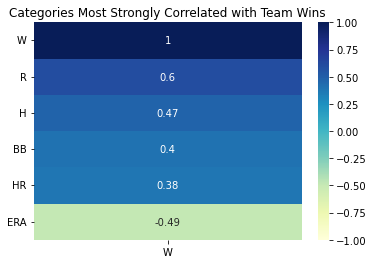

In [187]:
#Visualize the correlation between team wins and other categories
sns.heatmap(teams_modern_corr_vars.corr()[["W"]].sort_values(by = "W",ascending = False), annot = True, vmin = -1, vmax = 1, cmap = 'YlGnBu')
plt.yticks(rotation = "horizontal")
plt.title('Categories Most Strongly Correlated with Team Wins');
plt.savefig("../capstone/images/features_corr_with_team_wins.png")

In [144]:
teams_modern.corr()["W"].sort_values(ascending = False)

W             1.000000
R             0.599019
SV            0.495858
H             0.470896
SHO           0.453732
attendance    0.438103
BB            0.402388
HR            0.381463
IPouts        0.374113
SF            0.344321
AB            0.335750
FP            0.328109
2B            0.291753
G             0.291185
Ghome         0.290055
SOA           0.273849
HBP           0.171162
SB            0.162053
yearID        0.086395
BPF           0.064427
SO            0.059728
CG            0.057109
3B            0.033473
DP           -0.011570
CS           -0.013470
HRA          -0.091003
PPF          -0.139913
HA           -0.219573
E            -0.253314
BBA          -0.279310
ER           -0.369757
RA           -0.415025
ERA          -0.490395
Rank         -0.808459
L            -0.837906
Name: W, dtype: float64